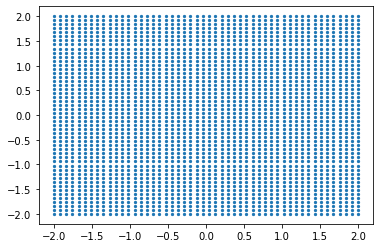

In [45]:
#To create rankine oval
import math
import numpy as np
from matplotlib import pyplot
N=50
xstart,xend=-2,2
ystart,yend=-2,2
x=np.linspace(xstart,xend,N)
y=np.linspace(ystart,yend,N)

X,Y=np.meshgrid(x,y)
pyplot.scatter(X,Y,s=5)

In [46]:

def get_vel_psi_phi_Source(X,Y,strength,xc,yc):
    """
    gets u,v,psi,phi of source fn centered about xc,yc for mesh X,Y
    """
    u=strength/ (2 * np.pi) *(X-xc)/((X-xc)**2+(Y-yc)**2)
    v=strength/ (2 * np.pi) *(Y-yc)/((X-xc)**2+(Y-yc)**2)
    psi=-1*strength / (2 * np.pi) * np.arctan2((Y - yc), (X - xc))
    phi=-1*strength / (2 * np.pi)/2*np.log((X-xc)**2+(Y-yc)**2)
    return u,v,psi,phi




In [47]:
#Freestream
Uinf=4
u_F= Uinf * np.ones((N, N), dtype=float)
v_F = np.zeros((N, N), dtype=float)
psi_F=-1*Uinf*Y
phi_F=-1*Uinf*X

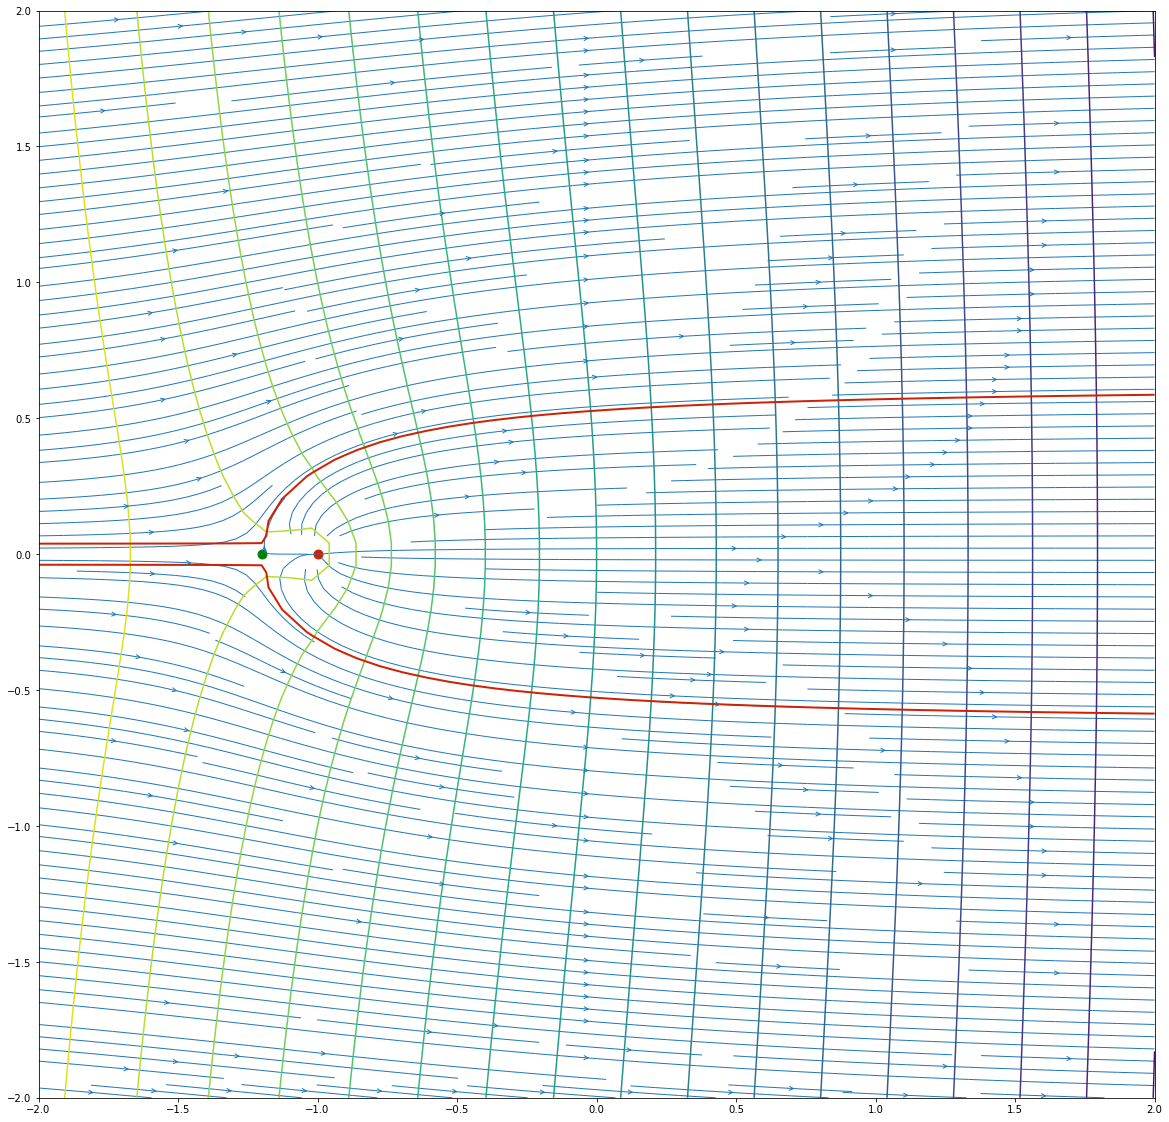

In [48]:
s1,x1,y1=5,-1,0
u1,v1,psi1,phi1=get_vel_psi_phi_Source(X,Y,s1,x1,y1)
u=u_F+u1
v=v_F+v1
psi=psi_F+psi1
phi=phi_F+phi1

width = 20
height = (yend - ystart) / (xend - xstart) * width
pyplot.figure(figsize=(width, height))
pyplot.streamplot(X,Y,u,v,density=3, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x1, y1,color='#CD2305', s=80, marker='o');
pyplot.contour(X,Y,phi,20);


# calculate the stagnation point
x_stagnation = x1 - s1 / (2 * np.pi * Uinf)
y_stagnation = y1

# display the stagnation point
pyplot.scatter(x_stagnation, y_stagnation, color='g', s=80, marker='o')

# display the dividing streamline
pyplot.contour(X, Y, psi, 
               levels=[-s1 / 2, s1 / 2], 
               colors='#CD2305', linewidths=2, linestyles='solid');

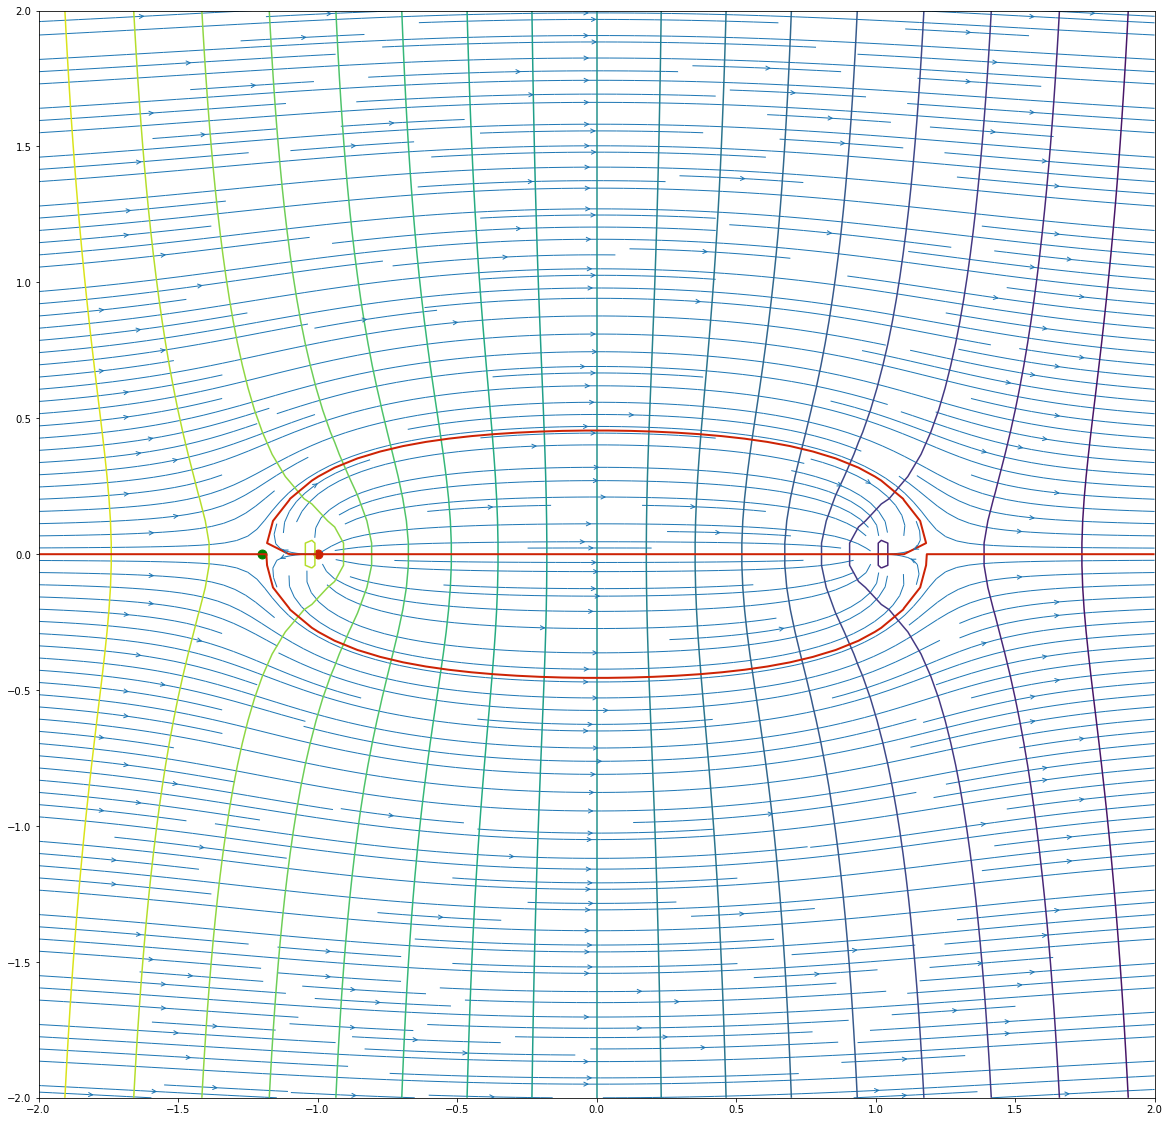

In [49]:
s2,x2,y2=-5,1,0
u2,v2,psi2,phi2=get_vel_psi_phi_Source(X,Y,s2,x2,y2)
u=u_F+u1+u2
v=v_F+v1+v2
psi=psi_F+psi1+psi2
phi=phi_F+phi1+phi2

width = 20
height = (yend - ystart) / (xend - xstart) * width
pyplot.figure(figsize=(width, height))
pyplot.streamplot(X,Y,u,v,density=3, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x1, y1,color='#CD2305', s=80, marker='o');
pyplot.contour(X,Y,phi,20);


# calculate the stagnation point
x_stagnation = x1 - s1 / (2 * np.pi * Uinf)
y_stagnation = y1

# display the stagnation point
pyplot.scatter(x_stagnation, y_stagnation, color='g', s=80, marker='o')

# display the dividing streamline
pyplot.contour(X, Y, psi, 
               levels=[0], 
               colors='#CD2305', linewidths=2, linestyles='solid');

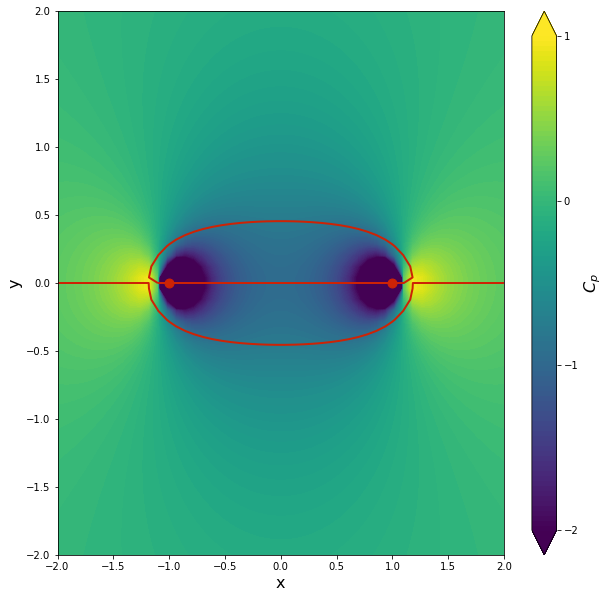

In [50]:
cp = 1.0 - (u**2 + v**2) / Uinf**2

# plot the pressure coefficient field
width = 10
height = (yend - ystart) / (xend - xstart) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)

contf = pyplot.contourf(X, Y, cp,
                        levels=np.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.scatter([x1, x2], [y1, y2],
               color='#CD2305', s=80, marker='o')
pyplot.contour(X, Y, psi,
               levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid');